#Violin plots using Seaborn

Violin plots are like box plots except that, instead of showing
the first and third quartiles and then outliers, they show an
estimate of the probability density function (called a kernel
density estimator).

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

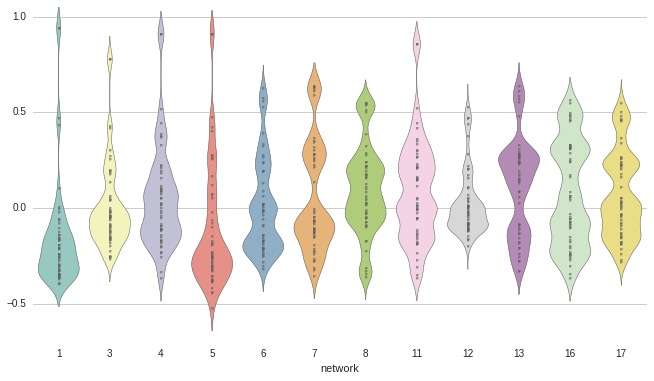

In [7]:
sns.set(style="whitegrid")

df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(corr_df, color="Set3", bw=.2, cut=.6,
               lw=.5, inner="points", inner_kws={"ms": 6})
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)
